# Distance metrics to test

* Geometric
    * Paired
    * Unpaired
* Statistical 
    * Paired
        * parametric
        * non-parametric
    * Unpaired
        * parametric
        * non-parametric

**Paired**:

* (global) Mahalanobis distance
* (local) PhiK
* (global) Global correlation
* (local) Power Predictve Score
* (local) Maximal Correlation Analysis
* (global and local) Distance Correlation
* (local) Maximal Information Coefficient
* (local and global) Procrustes shape difference
* (global) Hausdorf distance
* (local) Pearson
* (local) Spearman
* (local) Kendall-$\tau$
* (local) paired t-Test
* Hilbert-Schmidt Independence Criterion
* Heller–Heller–Gorfine
* monotonic alignment score

**Unpaired**:
* (local) Wasserstein distances
* (local) ANOVA
* (local) unpaired t-Test
* (local) Mann-Whitney U
* (local) Kolmogorov-Smirnov
* (local) Kruskall-Wallis
* (local) Probability of Exceedence
* ..

**Hybrid**:

In [431]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chisquare

In [375]:
def generate_test_sets(**kwargs):
    
    transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
    
    sets = []
    mcluster = datasets.make_checkerboard((1000,1000), 4, noise=4)[0]
    mcluster = StandardScaler().fit_transform(mcluster)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_circles(n_samples=1000, factor=.4, noise=.1)[0]
    mcluster = StandardScaler().fit_transform(mcluster)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_s_curve(n_samples=1000, noise=.2)[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,[0,2]]    
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_moons(n_samples=1000, noise=.1)[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_blobs(n_samples=1000, centers=3, cluster_std=[1., 0.5, 1.5])[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    mcluster = datasets.make_blobs(n_samples=1000, centers=4, cluster_std=[1., 0.5, 1.5, 0.75])[0]
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.lognormal(mean=0., sigma=0.25, size=1000)
    y = -0.3/x**3 + np.random.normal(loc=0., scale=0.1, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.lognormal(mean=0., sigma=0.25, size=1000)
    y = 2*x**2 + np.random.normal(loc=0., scale=0.1, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0, scale=0.5, size=1000)
    y = 2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0, scale=0.5, size=1000)
    y = -2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])

    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    #####################
    x = np.random.normal(loc=0.1, scale=0.5, size=1000)
    y = 2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.5, size=1000)
    y = -2*x**2 + np.random.uniform(low=-0.5, high=0.5, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]
    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ####################
    x = np.random.normal(loc=0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.2, high=0.2, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.2, high=0.2, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]
    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ####################
    x = np.random.normal(loc=0.1, scale=0.4, size=1000)
    y = -np.sin(4*x) + np.random.uniform(low=-0.3, high=0.3, size=1000)
    mcluster1 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster1 = StandardScaler().fit_transform(mcluster1)[:,:]

    x = np.random.normal(loc=-0.1, scale=0.4, size=1000)
    y = np.sin(4*x) + np.random.uniform(low=-0.3, high=0.3, size=1000)
    mcluster2 = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster2 = StandardScaler().fit_transform(mcluster2)[:,:]

    mcluster = np.vstack([mcluster1, mcluster2])
    sets.append(mcluster)
    ###################
    x = np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = x*np.sin(8*x+1) + np.random.uniform(low=-0.4, high=0.4, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)    
    ###################
    x = np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.normal(loc=0.0, scale=0.5, size=1000) # np.random.uniform(low=-0.4, high=0.4, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    sets.append(mcluster)
    ###################
    transformation = [[0.95, -0.33667341], [-0.30887718, 0.95]]
    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    ###################
    transformation = [[0.95, 0.33667341], [0.30887718, 0.95]]
    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]
    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    ###################
    transformation = [[0.7071, -0.7071], [0.7071, 0.7071]]

    x = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    y = np.random.uniform(low=-0.4, high=0.4, size=1000) # np.random.normal(loc=0.0, scale=0.5, size=1000)
    mcluster = np.hstack([x.reshape(-1,1), y.reshape(-1,1)])
    mcluster = StandardScaler().fit_transform(mcluster)[:,:]

    mcluster = np.dot(mcluster[:,[0,1]], transformation)
    sets.append(mcluster)
    
    return sets, kwargs



## Local correlations

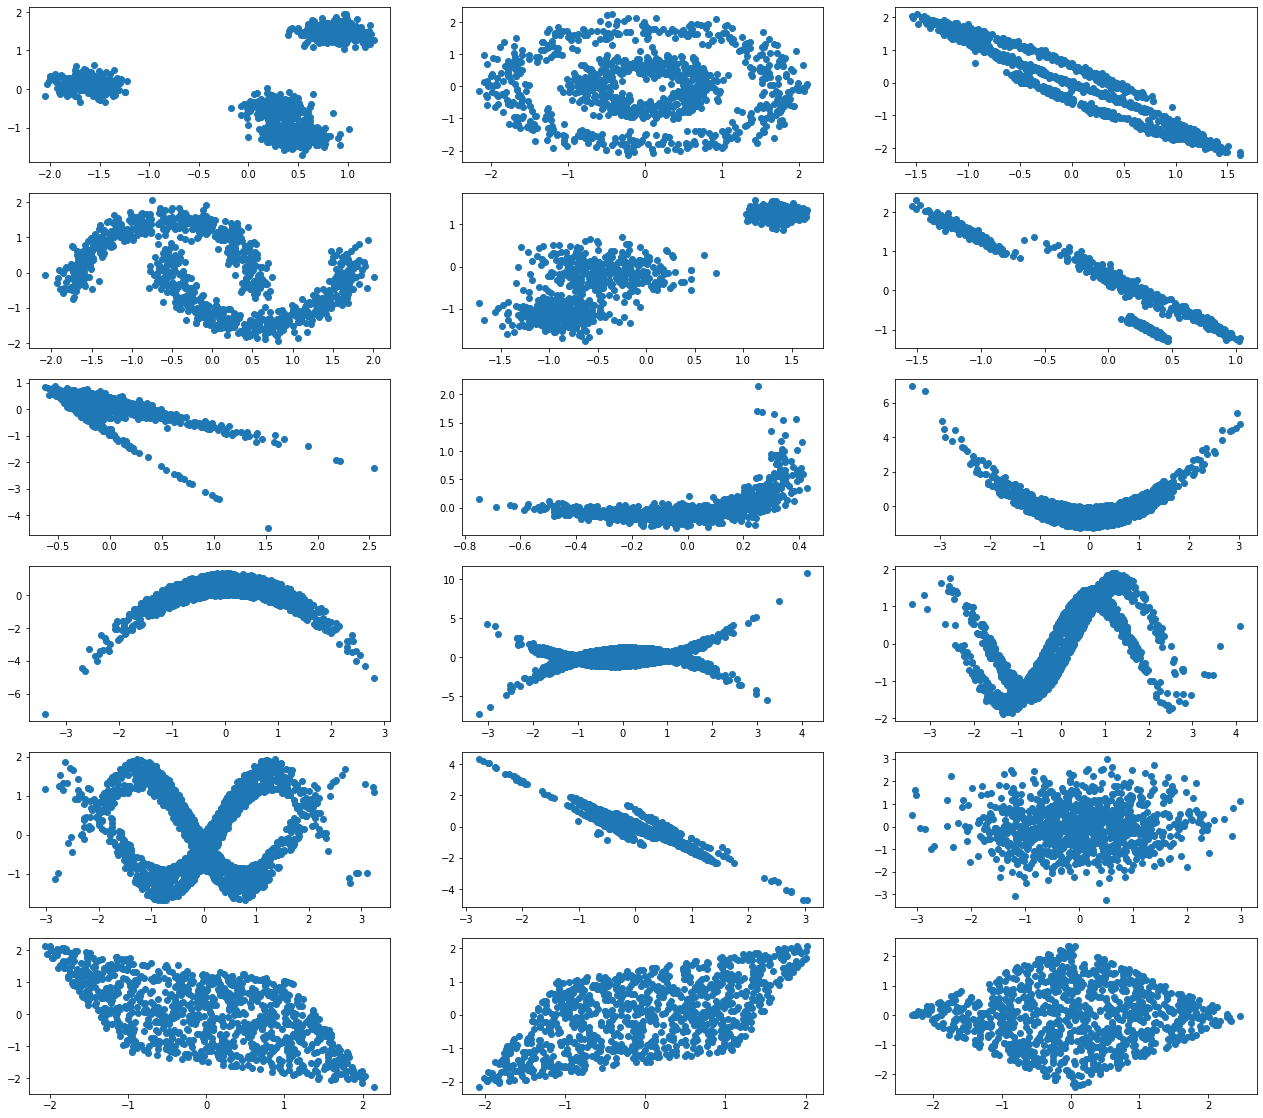

In [376]:
test_sets = generate_test_sets()[0]
fig, ax = plt.subplots(ncols=3, nrows=6, figsize=(22,20))
for k, ds in enumerate(test_sets):
    j=k%3 
    i=int(k/3)
    ax[i,j].scatter(x=ds[:,0], y=ds[:,1])

In [835]:
n=16
nbins=10
hnoise=1e-4
nruns=100

ecov = np.cov(test_sets[n][:,0], test_sets[n][:,1])
emp = test_sets[n]

aggstat = []
for k in range(nruns):
    bivar=np.random.multivariate_normal(np.mean(emp, axis=0), ecov, size=1000)

    bivar_freq = np.histogram2d(bivar[:,0], bivar[:,1], bins=nbins, density=True)[0]+np.random.uniform(low=0, high=hnoise, size=(10,10))
    emp_freq = np.histogram2d(emp[:,0], bivar[:,1], bins=nbins, density=True)[0]+np.random.uniform(low=0, high=hnoise, size=(10,10))

    bivar_freq = bivar_freq/np.sum(bivar_freq)
    emp_freq = emp_freq/np.sum(emp_freq)

    aggstat.append(np.nanmean(chisquare(bivar_freq, emp_freq)[0]))
np.mean(aggstat)

0.5955942176972869